# Example notebook


As first step, we need to import the `pysbm` package and the `networkx` package, 
which is the used package for representing the networks. 
Additionally, we want to create some plots and import `matplotlib`. 

If you later want to process larger graphs, we recommend using [PyPy](https://pypy.org). 


In [1]:
import pysbm
import networkx as nx
import matplotlib.pylab as pl

We start with one of the standard examples, the karate club network.

First, we need the graph and encapsulate the graph into a `partition` object with the known number of blocks.
The `pysbm` package offers a selection of objective functions and inference methods for the stochastic block model.
We want to replay the example of Karrer and Newmann. So we run infer stochastic block models for the karate club graph 
with the standard and the degree corrected SBM.

In [2]:
graph = nx.karate_club_graph()
standard_partition = pysbm.NxPartition(
    graph=graph, 
    number_of_blocks=2)
degree_corrected_partition = pysbm.NxPartition(
    graph=graph, 
    number_of_blocks=2,
    representation=standard_partition.get_representation())
standard_objective_function = pysbm.TraditionalUnnormalizedLogLikelyhood(is_directed=False)
degree_corrected_objective_function = pysbm.DegreeCorrectedUnnormalizedLogLikelyhood(is_directed=False)

Let's first take a look at the current state:

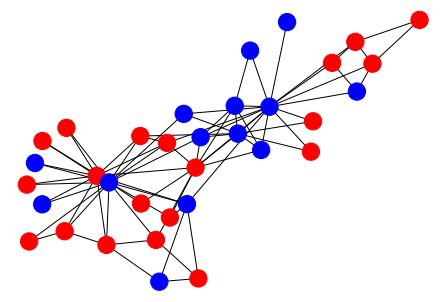

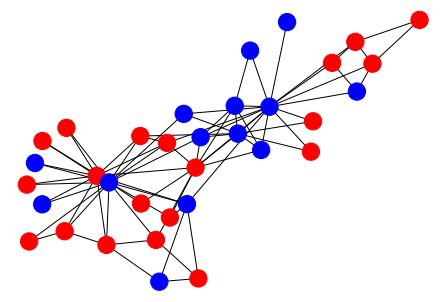

In [3]:
position = nx.spring_layout(graph)

nx.draw(graph, position, node_color=['r' if standard_partition.get_block_of_node(node) == 0 else 'b' for node in graph])
pl.show()
nx.draw(graph, position, node_color=['r' if degree_corrected_partition.get_block_of_node(node) == 0 else 'b' for node in graph])
pl.show()

As inference method we use MCMC with few steps.


In [4]:
standard_inference = pysbm.MetropolisHastingInference(graph, standard_objective_function, standard_partition)
degree_corrected_inference = pysbm.MetropolisHastingInference(graph, degree_corrected_objective_function, degree_corrected_partition)

Now we are able to infer the stochastic block model:

In [5]:
standard_inference.infer_stochastic_block_model()
degree_corrected_inference.infer_stochastic_block_model()

Depending on the random moves you will get different results:

Standard SBM with the splitting into high and low degree nodes


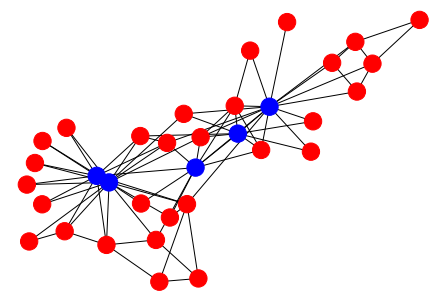

Degree Corrected SBM


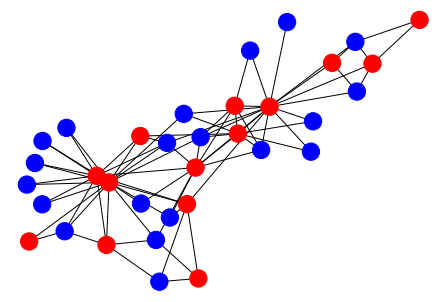

In [6]:
print("Standard SBM with the splitting into high and low degree nodes")
nx.draw(graph, position, node_color=['r' if standard_partition.get_block_of_node(node) == 0 else 'b' for node in graph])
pl.show()
print("Degree Corrected SBM")
nx.draw(graph, position, node_color=['r' if degree_corrected_partition.get_block_of_node(node) == 0 else 'b' for node in graph])
pl.show()